In [1]:
import numpy as np

In [2]:
class HMM:
    def __init__(self, A, B, pi):
        self.A=A
        self.B=B
        self.pi=pi

    def forward(self, obs_seq):
        T = len(obs_seq)
        N = self.A.shape[0]
        alpha = np.zeros((N, T))
        alpha[:, 0] = self.pi * self.B[:, obs_seq[0]]
        for t in range(1, T):
            for j in range(N):
                alpha[j, t] = np.sum(alpha[:, t-1] * self.A[:, j]) * self.B[j, obs_seq[t]]
        return alpha

    def backward(self, obs_seq):
        T = len(obs_seq)
        N = self.A.shape[0]
        beta = np.zeros((N, T))
        beta[:, -1] = 1
        for t in range(T-2, -1, -1):
            for i in range(N):
                beta[i, t] = np.sum(self.A[i, :] * self.B[:, obs_seq[t+1]] * beta[:, t+1])
        return beta

    def sequence_probability(self, obs_seq):        
        alpha = self.forward(obs_seq)
        seq_prob = np.sum(alpha[:, -1])
        return seq_prob

In [4]:
A = np.array([[0.5, 0.3, 0.2], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]])
B = np.array([[0.6, 0.1, 0.3],  
              [0.2, 0.7, 0.1],  
              [0.1, 0.2, 0.7]]) 
pi = np.array([1/3, 1/3, 1/3])

In [5]:
hmm = HMM(A, B, pi)
obs_seq = [2, 1, 0]
seq_prob_forward = hmm.sequence_probability(obs_seq)
print("Probability of the observation sequence (forward algorithm):", seq_prob_forward)
seq_prob_backward = hmm.sequence_probability(obs_seq)
print("Probability of the observation sequence (backward algorithm):", seq_prob_backward)

Probability of the observation sequence (forward algorithm): 0.03380666666666666
Probability of the observation sequence (backward algorithm): 0.03380666666666666


In [6]:
import pygraphviz

ModuleNotFoundError: No module named 'pygraphviz'

In [7]:
pip install pygraphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/104.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.9 kB ? eta -:--:--
     --------------------- --------------- 61.4/104.9 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 104.9/104.9 kB 757.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [49 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-311\pygraphviz
  creating build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  copying pygraphviz\tests\test_close.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
  co

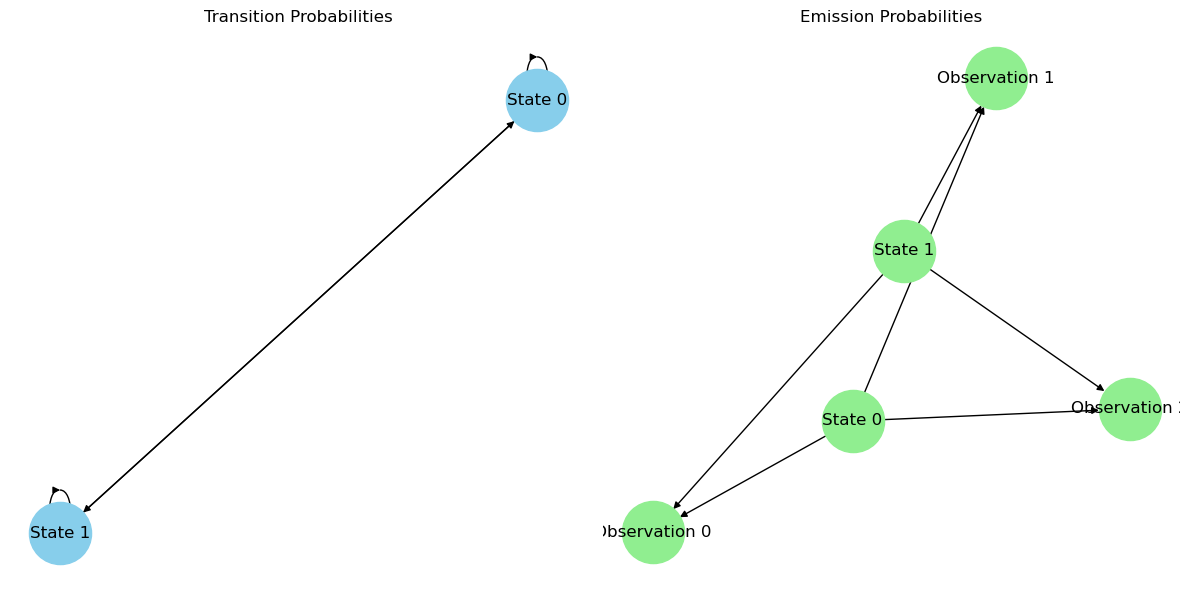

Observed Sequence: [2, 1, 0]


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
G_transitions = nx.DiGraph()
G_transitions.add_nodes_from(['State 0', 'State 1'])
G_transitions.add_edge('State 0', 'State 0', weight=A[0, 0])
G_transitions.add_edge('State 0', 'State 1', weight=A[0, 1])
G_transitions.add_edge('State 1', 'State 0', weight=A[1, 0])
G_transitions.add_edge('State 1', 'State 1', weight=A[1, 1])


G_emissions = nx.DiGraph()
G_emissions.add_nodes_from(['State 0', 'State 1'])
for i in range(len(B[0])):
    G_emissions.add_edge('State 0', f'Observation {i}', weight=B[0, i])
for i in range(len(B[1])):
    G_emissions.add_edge('State 1', f'Observation {i}', weight=B[1, i])

plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G_transitions, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, arrows=True)
plt.title('Transition Probabilities')

plt.subplot(122)
nx.draw(G_emissions, with_labels=True, node_size=2000, node_color='lightgreen', font_size=12, arrows=True)
plt.title('Emission Probabilities')

plt.tight_layout()
plt.show()

print("Observed Sequence:", obs_seq)

